# Pandas


* Series
* DataFrame
* Reindexing
* Dropping Entries
* Indexing, Selecting, Filtering
* Arithmetic and Data Alignment
* Function Application and Mapping
* Sorting and Ranking
* Axis Indices with Duplicate Values
* Summarizing and Computing Descriptive Statistics
* Cleaning Data
* Input and Output

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

## Series

A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels.  The data can be any NumPy data type and the labels are the Series' index.

Create a Series:

In [2]:
ser_1 = Series([1, 1, 2, -3, -5, 8, 13])
ser_1

0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Get the array representation of a Series:

In [5]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13], dtype=int64)

Index objects are immutable and hold the axis labels and metadata such as names and axis names.

Get the index of the Series:

In [ ]:
ser_1.index

RangeIndex(start=0, stop=7, step=1)

Create a Series with a custom index:

In [7]:
ser_2 = Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Get a value from a Series:

In [ ]:
ser_2[4] == ser_2['e']

True

Get a set of values from a Series by passing in a list:

In [ ]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

Get values great than 0:

In [ ]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Scalar multiply:

In [ ]:
ser_2 * 2

a     2
b     2
c     4
d    -6
e   -10
dtype: int64

Apply a numpy math function:

In [9]:
import numpy as np
np.exp(ser_2)

a    2.718282
b    2.718282
c    7.389056
d    0.049787
e    0.006738
dtype: float64

A Series is like a fixed-length, ordered dict.  

Create a series by passing in a dict:

In [11]:
dict_1 = {'foo' : 100,
          'bar' : 200,
          'baz' : 300}
ser_3 = Series(dict_1)
ser_3

foo    100
bar    200
baz    300
dtype: int64

Re-order a Series by passing in an index (indices not found are NaN):

In [21]:
index = ['foo', 'bar', 'baz', 'qux']
ser_4 = Series(dict_1, index=index, dtype=np.uint16)
ser_4

foo    100.0
bar    200.0
baz    300.0
qux      NaN
dtype: float64

Check for NaN with the pandas method:

In [ ]:
pd.isnull(ser_4)

foo    False
bar    False
baz    False
qux     True
dtype: bool

Check for NaN with the Series method:

In [ ]:
ser_4.isnull()

foo    False
bar    False
baz    False
qux     True
dtype: bool

Series automatically aligns differently indexed data in arithmetic operations:

In [ ]:
ser_3 + ser_4

bar    400.0
baz    600.0
foo    200.0
qux      NaN
dtype: float64

Name a Series:

In [ ]:
ser_4.name = 'foobarbazqux'

Name a Series index:

In [ ]:
ser_4.index.name = 'label'

In [ ]:
ser_4

label
foo    100.0
bar    200.0
baz    300.0
qux      NaN
Name: foobarbazqux, dtype: float64

Rename a Series' index in place:

In [ ]:
ser_4.index = ['fo', 'br', 'bz', 'qx']
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

## DataFrame

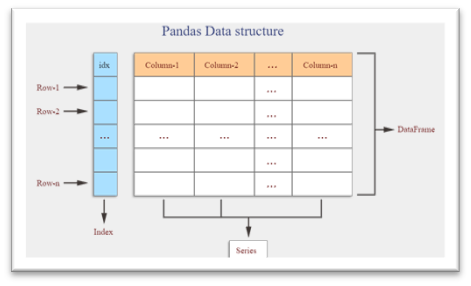

A DataFrame is a tabular data structure containing an ordered collection of columns.  Each column can have a different type.  DataFrames have both row and column indices and is analogous to a dict of Series.  Row and column operations are treated roughly symmetrically.  Columns returned when indexing a DataFrame are views of the underlying data, not a copy.  To obtain a copy, use the Series' copy method.

Create a DataFrame:

In [37]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1, columns=["state", "year", "ABCD", "pop"])
df_1

,state,year,ABCD,pop
0,VA,2012,NaN,5.0
1,VA,2013,NaN,5.1
2,VA,2014,NaN,5.2
3,MD,2014,NaN,4.0
4,MD,2015,NaN,4.1


Create a DataFrame specifying a sequence of columns:

In [ ]:
df_2 = DataFrame(data_1, columns=['year', 'state', 'pop'])
df_2

,year,state,pop
0,2012,VA,5.0
1,2013,VA,5.1
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


Like Series, columns that are not present in the data are NaN:

In [39]:
df_3 = DataFrame(data_1, columns=['year', 'state', 'pop', 'unempl'])
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,NaN
3,2014,MD,4.0,NaN
4,2015,MD,4.1,NaN


Retrieve a column by key, returning a Series:


In [ ]:
df_3['state']

0    VA
1    VA
2    VA
3    MD
4    MD
Name: state, dtype: object

Retrive a column by attribute, returning a Series:

In [ ]:
df_3.year

0    2012
1    2013
2    2014
3    2014
4    2015
Name: year, dtype: int64

Retrieve a row by position:

In [ ]:
df_3.state[0]

'VA'

Update a column by assignment:

In [ ]:
df_3['unempl'] = np.arange(5)
df_3

,year,state,pop,unempl
0,2012,VA,5.0,0
1,2013,VA,5.1,1
2,2014,VA,5.2,2
3,2014,MD,4.0,3
4,2015,MD,4.1,4


Assign a Series to a column (note if assigning a list or array, the length must match the DataFrame, unlike a Series):

In [45]:
unempl = Series([6.0, 6.0, 6.1], index=[2, 3, 4])
df_3['unempl'] = unempl
display(df_3, unempl)

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


2    6.0
3    6.0
4    6.1
dtype: float64

Assign a new column that doesn't exist to create a new column:

In [ ]:
df_3['state_dup'] = df_3['state']
df_3

,year,state,pop,unempl,state_dup
0,2012,VA,5.0,NaN,VA
1,2013,VA,5.1,NaN,VA
2,2014,VA,5.2,6.0,VA
3,2014,MD,4.0,6.0,MD
4,2015,MD,4.1,6.1,MD


Delete a column:

In [ ]:
del df_3['state_dup']
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Create a DataFrame from a nested dict of dicts (the keys in the inner dicts are unioned and sorted to form the index in the result, unless an explicit index is specified):

In [ ]:
pop = {'VA' : {2013 : 5.1, 2014 : 5.2},
       'MD' : {2014 : 4.0, 2015 : 4.1}}
df_4 = DataFrame(pop)
df_4

,VA,MD
2013,5.1,NaN
2014,5.2,4.0
2015,NaN,4.1


Transpose the DataFrame:

In [ ]:
df_4.T

,2013,2014,2015
VA,5.1,5.2,NaN
MD,NaN,4.0,4.1


Create a DataFrame from a dict of Series:

In [ ]:
data_2 = {'VA' : df_4['VA'][1:],
          'MD' : df_4['MD'][2:]}
df_5 = DataFrame(data_2)
df_5

,VA,MD
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame index name:

In [ ]:
df_5.index.name = 'year'
df_5

,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Set the DataFrame columns name:

In [ ]:
df_5.columns.name = 'state'
df_5

state,VA,MD
year,,
2014,5.2,NaN
2015,NaN,4.1


Return the data contained in a DataFrame as a 2D ndarray:

In [ ]:
df_5.values

array([[5.2, nan],
       [nan, 4.1]])

If the columns are different dtypes, the 2D ndarray's dtype will accomodate all of the columns:

In [ ]:
df_3.values

array([[2012, 'VA', 5.0, nan],
       [2013, 'VA', 5.1, nan],
       [2014, 'VA', 5.2, 6.0],
       [2014, 'MD', 4.0, 6.0],
       [2015, 'MD', 4.1, 6.1]], dtype=object)

## Reindexing

Create a new object with the data conformed to a new index.  Any missing values are set to NaN.

In [ ]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Reindexing rows returns a new frame with the specified index:

In [ ]:
df_3.reindex(list(reversed(range(0, 6))))

,year,state,pop,unempl
5,NaN,NaN,NaN,NaN
4,2015.0,MD,4.1,6.1
3,2014.0,MD,4.0,6.0
2,2014.0,VA,5.2,6.0
1,2013.0,VA,5.1,NaN
0,2012.0,VA,5.0,NaN


Missing values can be set to something other than NaN:

In [47]:
df_3.reindex(range(5, -1, -1), fill_value=0)

,year,state,pop,unempl
5,0,0,0.0,0.0
4,2015,MD,4.1,6.1
3,2014,MD,4.0,6.0
2,2014,VA,5.2,6.0
1,2013,VA,5.1,NaN
0,2012,VA,5.0,NaN


Interpolate ordered data like a time series:

In [48]:
ser_5 = Series(['foo', 'bar', 'baz'], index=[0, 2, 4])

In [49]:
ser_5.reindex(range(5), method='ffill')

0    foo
1    foo
2    bar
3    bar
4    baz
dtype: object

In [ ]:
ser_5.reindex(range(5), method='bfill')

0    foo
1    bar
2    bar
3    baz
4    baz
dtype: object

Reindex columns:

In [ ]:
df_3.reindex(columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
0,VA,5.0,NaN,2012
1,VA,5.1,NaN,2013
2,VA,5.2,6.0,2014
3,MD,4.0,6.0,2014
4,MD,4.1,6.1,2015


Reindex rows and columns while filling rows:

In [50]:
df_3.reindex(index=list(reversed(range(0, 6))),
             fill_value=0,
             columns=['state', 'pop', 'unempl', 'year'])

,state,pop,unempl,year
5,0,0.0,0.0,0
4,MD,4.1,6.1,2015
3,MD,4.0,6.0,2014
2,VA,5.2,6.0,2014
1,VA,5.1,NaN,2013
0,VA,5.0,NaN,2012


Reindex using ix:

In [ ]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


## Dropping Entries

Drop rows from a Series or DataFrame:

In [ ]:
df_7 = df_3.drop([0, 1])
df_7

,year,state,pop,unempl
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Drop columns from a DataFrame:

In [ ]:
df_7 = df_7.drop('unempl', axis=1)
df_7

,year,state,pop
2,2014,VA,5.2
3,2014,MD,4.0
4,2015,MD,4.1


## Indexing, Selecting, Filtering

Series indexing is similar to NumPy array indexing with the added bonus of being able to use the Series' index values.

In [ ]:
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Select a value from a Series:

In [ ]:
ser_2[0] == ser_2['a']

True

Select a slice from a Series:

In [ ]:
ser_2[1:4]

b    1
c    2
d   -3
dtype: int64

Select specific values from a Series:

In [ ]:
ser_2[['b', 'c', 'd']]

b    1
c    2
d   -3
dtype: int64

Select from a Series based on a filter:

In [ ]:
ser_2[ser_2 > 0]

a    1
b    1
c    2
dtype: int64

Select a slice from a Series with labels (note the end point is inclusive):

In [ ]:
ser_2['a':'b']

a    1
b    1
dtype: int64

Assign to a Series slice (note the end point is inclusive):

In [ ]:
ser_2['a':'b'] = 0
ser_2

a    0
b    0
c    2
d   -3
e   -5
dtype: int64

Pandas supports indexing into a DataFrame.

In [ ]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


Select specified columns from a DataFrame:

In [55]:
df_3[['pop', 'unempl']]

,pop,unempl
0,5.0,NaN
1,5.1,NaN
2,5.2,6.0
3,4.0,6.0
4,4.1,6.1


Select a slice from a DataFrame:

In [ ]:
df_3[:2]

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN


Select from a DataFrame based on a filter:

In [69]:
df_3[df_3['pop'] > 5]

,year,state,pop,unempl
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0


Select a slice of rows from a DataFrame (note the end point is inclusive):

In [ ]:
df_3[2:3]

,year,state,pop,unempl
2,2014,VA,5.2,6.0


Select a slice of rows from a specific column of a DataFrame:

#### LOC and ILOC
LOC is label-based slicing - have to specify rows and columns based on their row and column labels.

In [ ]:
df_3.loc[[0,3]]['pop']

0    5.0
3    4.0
Name: pop, dtype: float64

ILOC is integer index based - have to specify rows and columns by their integer index

In [ ]:
df_3.iloc[[0,3]]['pop']

0    5.0
3    4.0
Name: pop, dtype: float64

In [71]:
df1 = DataFrame({'price': [44, 52, 41],'sales': [600, 756, 533]},index=list('abc'))
df1

,price,sales
a,44,600
b,52,756
c,41,533


In [ ]:
df1.loc['b']

price     52
sales    756
Name: b, dtype: int64

In [ ]:
df1.iloc[1]

price     52
sales    756
Name: b, dtype: int64

In [ ]:
df1.loc[['a', 'c'], 'sales']

a    600
c    533
Name: sales, dtype: int64

In [78]:
df1.iloc[[0], [1]]

,sales
a,600


## Arithmetic and Data Alignment

Adding Series objects results in the union of index pairs if the pairs are not the same, resulting in NaN for indices that do not overlap:

In [ ]:
np.random.seed(0)
ser_6 = Series(np.random.randn(5),
               index=['a', 'b', 'c', 'd', 'e'])
ser_6

a    1.764052
b    0.400157
c    0.978738
d    2.240893
e    1.867558
dtype: float64

In [ ]:
np.random.seed(1)
ser_7 = Series(np.random.randn(5),
               index=['a', 'c', 'e', 'f', 'g'])
ser_7

a    1.624345
c   -0.611756
e   -0.528172
f   -1.072969
g    0.865408
dtype: float64

In [ ]:
ser_6 + ser_7

a    3.388398
b         NaN
c    0.366982
d         NaN
e    1.339386
f         NaN
g         NaN
dtype: float64

Set a fill value instead of NaN for indices that do not overlap:

In [ ]:
ser_6.add(ser_7, fill_value=0)

a    3.388398
b    0.400157
c    0.366982
d    2.240893
e    1.339386
f   -1.072969
g    0.865408
dtype: float64

Adding DataFrame objects results in the union of index pairs for rows and columns if the pairs are not the same, resulting in NaN for indices that do not overlap:

In [ ]:
np.random.seed(0)
df_8 = DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['a', 'b', 'c'])
df_8

,a,b,c
0,0.548814,0.715189,0.602763
1,0.544883,0.423655,0.645894
2,0.437587,0.891773,0.963663


In [ ]:
np.random.seed(1)
df_9 = DataFrame(np.random.rand(9).reshape((3, 3)),
                 columns=['b', 'c', 'd'])
df_9

,b,c,d
0,0.417022,0.720324,0.000114
1,0.302333,0.146756,0.092339
2,0.186260,0.345561,0.396767


In [ ]:
df_8 + df_9

,a,b,c,d
0,NaN,1.132211,1.323088,NaN
1,NaN,0.725987,0.792650,NaN
2,NaN,1.078033,1.309223,NaN


Set a fill value instead of NaN for indices that do not overlap:

In [ ]:
df_10 = df_8.add(df_9, fill_value=0)
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


Like NumPy, pandas supports arithmetic operations between DataFrames and Series.

Match the index of the Series on the DataFrame's columns, broadcasting down the rows:

In [ ]:
ser_8 = df_10.iloc[0]
df_11 = df_10 - ser_8
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,-0.003930,-0.406224,-0.530438,0.092224
2,-0.111226,-0.054178,-0.013864,0.396653


Match the index of the Series on the DataFrame's columns, broadcasting down the rows and union the indices that do not match:

In [ ]:
ser_9 = Series(range(3), index=['a', 'd', 'e'])
ser_9

a    0
d    1
e    2
dtype: int64

In [ ]:
df_11 - ser_9

,a,b,c,d,e
0,0.000000,NaN,NaN,-1.000000,NaN
1,-0.003930,NaN,NaN,-0.907776,NaN
2,-0.111226,NaN,NaN,-0.603347,NaN


Broadcast over the columns and match the rows (axis=0) by using an arithmetic method:

In [ ]:
df_10

,a,b,c,d
0,0.548814,1.132211,1.323088,0.000114
1,0.544883,0.725987,0.792650,0.092339
2,0.437587,1.078033,1.309223,0.396767


In [ ]:
ser_10 = Series([100, 200, 300])
ser_10

0    100
1    200
2    300
dtype: int64

In [ ]:
df_10.sub(ser_10, axis=0)

,a,b,c,d
0,-99.451186,-98.867789,-98.676912,-99.999886
1,-199.455117,-199.274013,-199.207350,-199.907661
2,-299.562413,-298.921967,-298.690777,-299.603233


## Function Application and Mapping

NumPy ufuncs (element-wise array methods) operate on pandas objects:

In [ ]:
df_11 = np.abs(df_11)
df_11

,a,b,c,d
0,0.000000,0.000000,0.000000,0.000000
1,0.003930,0.406224,0.530438,0.092224
2,0.111226,0.054178,0.013864,0.396653


Apply a function on 1D arrays to each column:

In [ ]:
func_1 = lambda x: x.max() - x.min()
df_11.apply(func_1)

a    0.111226
b    0.406224
c    0.530438
d    0.396653
dtype: float64

Apply a function on 1D arrays to each row:

In [ ]:
df_11.apply(func_1, axis=1)

0    0.000000
1    0.526508
2    0.382789
dtype: float64

Apply a function and return a DataFrame:

In [ ]:
func_2 = lambda x: Series([x.min(), x.max()], index=['min', 'max'])
df_11.apply(func_2)

,a,b,c,d
min,0.000000,0.000000,0.000000,0.000000
max,0.111226,0.406224,0.530438,0.396653


Apply an element-wise Python function to a DataFrame:

In [ ]:
func_3 = lambda x: '%.2f' %x
df_11.applymap(func_3)

,a,b,c,d
0,0.00,0.00,0.00,0.00
1,0.00,0.41,0.53,0.09
2,0.11,0.05,0.01,0.40


Apply an element-wise Python function to a Series:

In [ ]:
df_11['a'].map(func_3)

0    0.00
1    0.00
2    0.11
Name: a, dtype: object

## Sorting and Ranking

In [ ]:
ser_4

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

Sort a Series by its index:

In [ ]:
ser_4.sort_index()

br    200.0
bz    300.0
fo    100.0
qx      NaN
Name: foobarbazqux, dtype: float64

Sort a Series by its values:

In [ ]:
ser_4.sort_values()

fo    100.0
br    200.0
bz    300.0
qx      NaN
Name: foobarbazqux, dtype: float64

In [ ]:
df_12 = DataFrame(np.arange(12).reshape((3, 4)),
                  index=['three', 'one', 'two'],
                  columns=['c', 'a', 'b', 'd'])
df_12

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Sort a DataFrame by its index:

In [ ]:
df_12.sort_index()

,c,a,b,d
one,4,5,6,7
three,0,1,2,3
two,8,9,10,11


Sort a DataFrame by columns in descending order:

In [ ]:
df_12.sort_index(axis=1, ascending=False)

,d,c,b,a
three,3,0,2,1
one,7,4,6,5
two,11,8,10,9


Sort a DataFrame's values by column:

In [ ]:
df_12.sort_values(by=['d', 'c'])

,c,a,b,d
three,0,1,2,3
one,4,5,6,7
two,8,9,10,11


Ranking is similar to numpy.argsort except that ties are broken by assigning each group the mean rank:

In [ ]:
ser_11 = Series([7, -5, 7, 4, 2, 0, 4, 7])
ser_11 = ser_11.sort_values()
ser_11

1   -5
5    0
4    2
3    4
6    4
0    7
2    7
7    7
dtype: int64

In [ ]:
ser_11.rank()

1    1.0
5    2.0
4    3.0
3    4.5
6    4.5
0    7.0
2    7.0
7    7.0
dtype: float64

Rank a Series according to when they appear in the data:

In [ ]:
ser_11.rank(method='first')

1    1.0
5    2.0
4    3.0
3    4.0
6    5.0
0    6.0
2    7.0
7    8.0
dtype: float64

Rank a Series in descending order, using the maximum rank for the group:

In [ ]:
ser_11.rank(ascending=False, method='max')

1    8.0
5    7.0
4    6.0
3    5.0
6    5.0
0    3.0
2    3.0
7    3.0
dtype: float64

DataFrames can rank over rows or columns.

In [ ]:
df_13 = DataFrame({'foo' : [7, -5, 7, 4, 2, 0, 4, 7],
                   'bar' : [-5, 4, 2, 0, 4, 7, 7, 8],
                   'baz' : [-1, 2, 3, 0, 5, 9, 9, 5]})
df_13

,foo,bar,baz
0,7,-5,-1
1,-5,4,2
2,7,2,3
3,4,0,0
4,2,4,5
5,0,7,9
6,4,7,9
7,7,8,5


Rank a DataFrame over rows:

In [ ]:
df_13.rank()

,foo,bar,baz
0,7.0,1.0,1.0
1,1.0,4.5,3.0
2,7.0,3.0,4.0
3,4.5,2.0,2.0
4,3.0,4.5,5.5
5,2.0,6.5,7.5
6,4.5,6.5,7.5
7,7.0,8.0,5.5


Rank a DataFrame over columns:

In [ ]:
df_13.rank(axis=1)

,foo,bar,baz
0,3.0,1.0,2.0
1,1.0,3.0,2.0
2,3.0,1.0,2.0
3,3.0,1.5,1.5
4,1.0,2.0,3.0
5,1.0,2.0,3.0
6,1.0,2.0,3.0
7,2.0,3.0,1.0


## Axis Indexes with Duplicate Values

Labels do not have to be unique in Pandas:

In [ ]:
ser_12 = Series(range(5), index=['foo', 'foo', 'bar', 'bar', 'baz'])
ser_12

foo    0
foo    1
bar    2
bar    3
baz    4
dtype: int64

In [ ]:
ser_12.index.is_unique

False

Select Series elements:

In [ ]:
ser_12['foo']

foo    0
foo    1
dtype: int64

Select DataFrame elements:

In [ ]:
df_14 = DataFrame(np.random.randn(5, 4),
                  index=['foo', 'foo', 'bar', 'bar', 'baz'])
df_14

,0,1,2,3
foo,-2.363469,1.135345,-1.017014,0.637362
foo,-0.859907,1.772608,-1.110363,0.181214
bar,0.564345,-0.566510,0.729976,0.372994
bar,0.533811,-0.091973,1.913820,0.330797
baz,1.141943,-1.129595,-0.850052,0.960820


In [ ]:
df_14.loc['bar']

,0,1,2,3
bar,0.564345,-0.566510,0.729976,0.372994
bar,0.533811,-0.091973,1.913820,0.330797


## Summarizing and Computing Descriptive Statistics

Unlike NumPy arrays, Pandas descriptive statistics automatically exclude missing data.  NaN values are excluded unless the entire row or column is NA.

In [ ]:
df_3

,year,state,pop,unempl
0,2012,VA,5.0,NaN
1,2013,VA,5.1,NaN
2,2014,VA,5.2,6.0
3,2014,MD,4.0,6.0
4,2015,MD,4.1,6.1


In [ ]:
df_3.sum()

year           10068
state     VAVAVAMDMD
pop             23.4
unempl          18.1
dtype: object

Sum over the rows:

In [ ]:
df_3.sum(axis=1)

0    2017.0
1    2018.1
2    2025.2
3    2024.0
4    2025.2
dtype: float64

Account for NaNs:

In [ ]:
df_3.sum(axis=1, skipna=False)

0       NaN
1       NaN
2    2025.2
3    2024.0
4    2025.2
dtype: float64

## Cleaning Data
* Replace
* Drop
* Concatenate

We will be learning more about data cleaning in great detail as we progress

Setup a DataFrame:

In [ ]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'population' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1)
df_1

,state,year,population
0,VA,2012,5.0
1,VA,2013,5.1
2,VA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


### Replace

Replace all occurrences of a string with another string, in place (no copy):

In [ ]:
df_1.replace('VA', 'VIRGINIA', inplace=True)
df_1

,state,year,population
0,VIRGINIA,2012,5.0
1,VIRGINIA,2013,5.1
2,VIRGINIA,2014,5.2
3,MD,2014,4.0
4,MD,2015,4.1


In a specified column, replace all occurrences of a string with another string, in place (no copy):

In [ ]:
df_1.replace({'state' : { 'MD' : 'MARYLAND' }}, inplace=True)
df_1

,state,year,population
0,VIRGINIA,2012,5.0
1,VIRGINIA,2013,5.1
2,VIRGINIA,2014,5.2
3,MARYLAND,2014,4.0
4,MARYLAND,2015,4.1


### Drop

Drop the 'population' column and return a copy of the DataFrame:

In [ ]:
df_2 = df_1.drop('population', axis=1)
df_2

,state,year
0,VIRGINIA,2012
1,VIRGINIA,2013
2,VIRGINIA,2014
3,MARYLAND,2014
4,MARYLAND,2015


### Concatenate

Concatenate two DataFrames:

In [ ]:
data_2 = {'state' : ['NY', 'NY', 'NY', 'FL', 'FL'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'population' : [6.0, 6.1, 6.2, 3.0, 3.1]}
df_3 = DataFrame(data_2)
df_3

,state,year,population
0,NY,2012,6.0
1,NY,2013,6.1
2,NY,2014,6.2
3,FL,2014,3.0
4,FL,2015,3.1


In [ ]:
df_4 = pd.concat([df_1, df_3])
df_4

,state,year,population
0,VIRGINIA,2012,5.0
1,VIRGINIA,2013,5.1
2,VIRGINIA,2014,5.2
3,MARYLAND,2014,4.0
4,MARYLAND,2015,4.1
0,NY,2012,6.0
1,NY,2013,6.1
2,NY,2014,6.2
3,FL,2014,3.0
4,FL,2015,3.1


## Input and Output
* Reading
* Writing

### Reading

Read data from a CSV file into a DataFrame (use sep='\t' for TSV):

In [79]:
df_1 = pd.read_csv("ozone.csv")

List the first five rows of the DataFrame:

In [80]:
df_1.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [ ]:
df_1.shape

(153, 6)

Get a summary of the DataFrame:

In [81]:
df_1.describe(include="all")

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


Use info() to get the high-level count and dtypes

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Check for missing values

In [ ]:
df_1.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

Ozone has 37 NAs and Solar.R has 7 NAs. We will learn about dealing with missing values as we progress.

### Writing

Create a copy of the CSV file, encoded in UTF-8 and hiding the index and header labels:

In [ ]:
df_1.to_csv('ozone_copy.csv',
            encoding='utf-8',
            index=False,
            header=False)

### Class Exercise:
1. Write a Pandas program to compare the elements of the two Pandas Series [234,55, 64, 56, 10] and [1, 2, 64, 98, 10]
2. To the following Series - ['101', '200', 'python', 'sql', 'pytorch'] - append [900, "spark"], but make sure the index ordering is in sequence
3. Convert the following series of lists into a single Series:
   ['dog', 'cat', 'rat'],
   ['dog', 'cat'],
   ['rat']
4. Create a Series containing values from 0 to 10. Create a new series which is a subset of values from the first series where all the values are < 7
5. Create a Series containing values from 1 to 5 with index from 'a1' to 'a5'. Then change the order of the index from [a1, a2, a3, a4, a5] to [a2, a1, a3, a4, a5]
6. Read the Wine Quality CSV file and display its summary statistics
7. Are there any missing values in the dataset?
8. Sort the dataframe from highest to lowest in terms of the quality of the wine
9. Reorder the index after sorting and create a new dataframe (use reset_index())
10. Obtain the volatile acidity and the pH values of the first 5 wines from the df in Q4

In [ ]:
ds1 = pd.Series([234,55, 64, 56, 10])
ds2 = pd.Series([1, 2, 64, 98, 10])
print("equal:")
print(ds1 == ds2)
print("greater than:")
print(ds1 > ds2)
print("lesser than:")
print(ds1 < ds2)

equal:
0    False
1    False
2     True
3    False
4     True
dtype: bool
greater than:
0     True
1     True
2    False
3    False
4    False
dtype: bool
lesser than:
0    False
1    False
2    False
3     True
4    False
dtype: bool


In [ ]:
s1 = pd.Series(['101', '200', 'python', 'sql', 'pytorch'])
sub_s1 = pd.Series([900, "spark"])
s2 = s1.append(sub_s1, ignore_index=True)
print(s2)

0        101
1        200
2     python
3        sql
4    pytorch
5        900
6      spark
dtype: object


In [88]:
s = pd.Series([
    ['dog', 'cat', 'rat'],
    ['dog', 'cat'],
    ['rat']])
print(s)
s = s.apply(pd.Series).stack()#.reset_index(drop=True)
# print(s)
s, s.iloc[0]

0    [dog, cat, rat]
1         [dog, cat]
2              [rat]
dtype: object


(0  0    dog
    1    cat
    2    rat
 1  0    dog
    1    cat
 2  0    rat
 dtype: object,
 'dog')

In [84]:
a = pd.Series(['dog', 'cat', 'rat'])
b = pd.Series(['dog', 'cat'])
c = pd.Series(['rat'])

a = pd.concat([a, b, c], ignore_index=True)
a

0    dog
1    cat
2    rat
3    dog
4    cat
5    rat
dtype: object

In [ ]:
s = pd.Series([0,1,2,3,4,5,6,7,8,9,10])
n = 7
s2 = s[s < n]
s2

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [ ]:
s = pd.Series(data = [1,2,3,4,5], index = ['a1', 'a2', 'a3','a4','a5'])
print(s)
s = s.reindex(index = ['a2','a1','a3','a4','a5'])
print(s)

a1    1
a2    2
a3    3
a4    4
a5    5
dtype: int64
a2    2
a1    1
a3    3
a4    4
a5    5
dtype: int64


In [ ]:
df = pd.read_csv('winequality-red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_sorted = df.sort_values(by = ['quality'], ascending=False)
df_sorted.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [ ]:
df2 = df_sorted.reset_index(drop=True)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
2,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
3,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
4,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1595,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
1596,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1597,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


In [ ]:
df2.iloc[0:5][['volatile acidity', 'pH']]

,volatile acidity,pH
0,0.35,3.15
1,0.33,3.23
2,0.85,3.56
3,0.40,3.21
4,0.42,3.35


#### end of the notebook.